In [2]:
from IPython.display import display

import pandas as pd
import warnings
from model_drift import settings, helpers
from model_drift.data.utils import nested2series
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

from model_drift.data.padchest import PadChest, LABEL_MAP
import plotly.graph_objects as go

warnings.filterwarnings("ignore")


In [4]:
jsonl_file = str(settings.TOP_DIR.joinpath("results", 'vae', 'padchest-trained', "all-data", 'preds.jsonl'))
vae_df = helpers.jsonl_files2dataframe(jsonl_file)
vae_df = pd.concat(
    [
        vae_df,
        pd.DataFrame(vae_df['mu'].values.tolist(), columns=[f"mu.{c:0>3}" for c in range(128)])
    ],
    axis=1
)
vae_df.head()


100%|██████████| 160819/160819 [00:20<00:00, 8013.95it/s]


,index,mu,logvar,error,mu.000,mu.001,mu.002,mu.003,mu.004,mu.005,...,mu.118,mu.119,mu.120,mu.121,mu.122,mu.123,mu.124,mu.125,mu.126,mu.127
0,20536686640136348236148679891455886468_k6ga29.png,"[0.004903476685285568, 0.00975932739675045, -0...","[0.00420594634488225, -0.032170265913009644, -...",0.007225,0.004903,0.009759,-0.840139,-0.016406,0.012096,0.021054,...,0.008214,-0.124864,-0.011458,-0.035856,-0.005253,-0.525054,-0.012718,-0.015304,1.603692,1.275674
1,113855343774216031107737439268243531979_3k951n...,"[-0.039043813943862915, -0.007190241944044828,...","[-0.013759884051978588, -0.012844430282711983,...",0.006071,-0.039044,-0.007190,-1.345544,0.016048,0.037869,-0.036479,...,0.042117,0.080279,0.014332,-0.000268,-0.019087,0.168344,-0.046811,-0.030200,-0.740812,-1.276945
2,313723174271082992847610802266403640553-4_hhi4...,"[-0.03004823438823223, -0.05634206160902977, 0...","[-0.010940825566649437, 0.017154257744550705, ...",0.013905,-0.030048,-0.056342,0.508030,-0.041828,-0.014656,0.010803,...,0.050155,0.336182,0.111974,0.046037,0.092280,-1.214425,0.014846,0.073163,0.226776,0.311751
3,105529804483623054726294337265160703666_6zn76a...,"[0.001704810420051217, -0.014846593141555786, ...","[-0.0063932850025594234, 0.010232711210846901,...",0.004213,0.001705,-0.014847,-0.050661,-0.013582,-0.015157,-0.007484,...,0.000933,0.042541,-0.017803,0.016669,-0.019601,-1.454505,-0.013419,0.012802,0.410283,0.671507
4,102185472428957491598043403159908631419_zb8kco...,"[-0.03474627062678337, -0.021671226248145103, ...","[-0.022024642676115036, -0.014861042611300945,...",0.009243,-0.034746,-0.021671,-1.811071,0.097347,-0.022849,-0.029674,...,-0.045857,-0.070322,0.004691,0.022646,-0.038137,0.053273,-0.028840,0.028752,-1.016176,-1.146801


In [ ]:
## TODO: PEDs DATA

# jsonl_file = str(settings.TOP_DIR.joinpath("results", 'outside-data', "pediatric-vae-preds.jsonl"))
# pvae_df = helpers.jsonl_files2dataframe(jsonl_file)
# pvae_df = pd.concat(
#     [
#         pvae_df,
#         pd.DataFrame(pvae_df['mu'].values.tolist(), columns=[f"mu.{c:0>3}" for c in range(128)])
#     ],
#     axis=1
# )
# pvae_df.head()

100%|██████████| 5232/5232 [00:00<00:00, 9356.88it/s]


,index,mu,logvar,error,mu.000,mu.001,mu.002,mu.003,mu.004,mu.005,...,mu.118,mu.119,mu.120,mu.121,mu.122,mu.123,mu.124,mu.125,mu.126,mu.127
0,Pediatric_Chest_X-ray_Pneumonia/train/NORMAL/I...,"[-0.015300623141229153, 0.026357755064964294, ...","[0.011444917879998684, 0.023694228380918503, -...",0.009123,-0.015301,0.026358,-0.161248,0.006828,-0.024209,0.021338,...,0.029356,0.185193,-0.056293,0.032243,-0.057131,-0.830066,-0.001191,0.068564,-1.404098,-0.102461
1,Pediatric_Chest_X-ray_Pneumonia/train/NORMAL/I...,"[-0.012328023090958595, 0.03272838145494461, -...","[-0.013114223256707191, 0.03820696845650673, -...",0.011135,-0.012328,0.032728,-0.479747,0.052400,-0.081375,0.025304,...,0.024534,0.083026,-0.052110,0.043449,0.019975,-0.219239,0.007368,0.019451,-0.948317,-0.188215
2,Pediatric_Chest_X-ray_Pneumonia/train/NORMAL/I...,"[-0.04322167485952377, 0.060755811631679535, 0...","[0.02963685244321823, 0.05109911039471626, -1....",0.016097,-0.043222,0.060756,0.186926,0.046731,-0.016739,0.083952,...,-0.019800,0.107643,-0.064345,-0.020409,0.035565,-0.163890,-0.010248,0.030458,-1.167260,-0.230910
3,Pediatric_Chest_X-ray_Pneumonia/train/NORMAL/I...,"[-0.029027242213487625, 0.01797046698629856, -...","[-0.004472499713301659, 0.03301604092121124, -...",0.017722,-0.029027,0.017970,-0.395584,0.068490,-0.079396,-0.001521,...,0.024729,0.081604,-0.099854,-0.012942,-0.041262,-0.900648,0.026903,0.070251,-1.144185,0.167255
4,Pediatric_Chest_X-ray_Pneumonia/train/NORMAL/N...,"[0.028366880491375923, 0.07368270307779312, -0...","[-0.008325975388288498, 0.007292307913303375, ...",0.018941,0.028367,0.073683,-0.609924,-0.034713,-0.017765,0.089107,...,-0.048149,0.248163,-0.066515,0.040412,-0.025493,-0.085305,0.003596,0.098388,-1.466721,-0.024784


In [5]:
# Load padchest CSV
pc = PadChest(settings.PADCHEST_FILENAME)
pc.prepare()
pc.merge(vae_df, left_on="ImageID", right_on="index", how='inner')
train, val, test = pc.split(settings.PADCHEST_SPLIT_DATES, studydate_index=True)


In [6]:
FLOAT = lambda x: pd.to_numeric(x, errors='coerce').astype(float)
CAT = lambda x: x.astype('category')

vae_cols = {c: FLOAT for c in list(pc.df) if c.startswith("mu.") and 'all' not in c}
score_cols = {c: FLOAT for c in list(pc.df) if c.startswith("activation.") and 'all' not in c}
metadata_cols = {
    'age': FLOAT,
    'Projection': CAT,
    "PatientSex_DICOM": CAT,
    "ViewPosition_DICOM": CAT,
    "Modality_DICOM": CAT,
    "Manufacturer_DICOM": CAT,
    "PhotometricInterpretation_DICOM": CAT,
    "PixelRepresentation_DICOM": CAT,
    "PixelAspectRatio_DICOM": CAT,
    "SpatialResolution_DICOM": FLOAT,
    "BitsStored_DICOM": CAT,
    "WindowCenter_DICOM": FLOAT,
    "WindowWidth_DICOM": FLOAT,
    "Rows_DICOM": FLOAT,
    "Columns_DICOM": FLOAT,
    "XRayTubeCurrent_DICOM": CAT,
    "Exposure_DICOM": FLOAT,
    "ExposureInuAs_DICOM": FLOAT,
    "RelativeXRayExposure_DICOM": FLOAT,
    "Frontal": lambda x: x.astype(str),
    "Pediatric": CAT
}


for c, f in metadata_cols.items():
    pc.df[c] = f(pc.df[c])

['GENERICA', 'OBLICUA']
Categories (2, object): ['GENERICA', 'OBLICUA']


Text(87.0, 0.5, 'ViewPos')

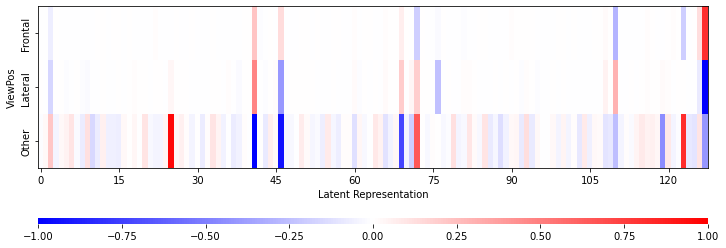

In [17]:

df = pc.df

grid_kws = {"height_ratios": (.6, .02), "hspace": .6}
col = 'ViewPos'
view_map = {"Frontal": ["PA", "AP", "AP_horizontal", "POSTEROANTERIOR", "ANTEROPOSTERIOR"], "Lateral": [ 'LATERAL', 'LL', 'LLD', "RL",]}
rev = {vv:k for k, v in view_map.items() for vv in v}
df[col] = df['ViewPosition_DICOM'].apply(lambda x: rev.get(x, "Other")).dropna()
averages = df.groupby("ViewPos")[list(vae_cols)].mean()

print(df[df[col] =="Other"]["ViewPosition_DICOM"].unique())

f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(12, 4))
res = sns.heatmap(averages.values, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"},
                 cmap="bwr", vmin=-1, vmax=1,
                 yticklabels=averages.index, xticklabels=15)

for _, spine in res.spines.items():
    spine.set_visible(True)
ax.set_xlabel('Latent Representation')
ax.set_ylabel(col)
